In [1]:
import numpy as np
import HindiCharts as hc
import pandas as pd
import matplotlib.pyplot as plt
import decimal
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as mfm
import MatplotlibKeyMap as mk
import os

Function to generate Vyanjan Key Matrix

In [2]:
def generateVyanjanKeyMatrix ():
    arr = np.random.permutation(33)

    dict = {}
    idx = 1
    for i in arr:
        dict[hc.IndexToVyanjan[idx].decode('utf-8')] = hc.IndexToVyanjan[i+1].decode('utf-8')
        
        idx = idx+1
    return dict

Function to generate Matra Key Matrix

In [3]:
def generateMatraKeyMatrix ():
    arr = np.random.permutation(13)

    dict = {}
    idx = 1
    for i in arr:
        dict[hc.IndexToMatra[idx]] = hc.IndexToMatra[i+1]
        
        idx = idx+1
    return dict

Function to generate Swar Key Matrix

In [4]:
def generateSwarKeyMatrix ():
    arr = np.random.permutation(12)

    dict = {}
    idx = 1
    for i in arr:
        dict[hc.IndexToSwar[idx]] = hc.IndexToSwar[i+1]
        
        idx = idx+1
    return dict

Encryption Function

In [5]:
def encryptfunc():
    CipherText= []
    PlainText = []

    SubstitutionMatrixMatra = generateMatraKeyMatrix()
    SubstitutionMatrixSwar = generateSwarKeyMatrix()
    SubstitutionMatrixVyanjan = generateVyanjanKeyMatrix()
    
    with open('PlainTextinput.txt',encoding='utf-8') as f:
        sentence=f.read()
        
        words = sentence.split()
        print(f'Number of words: {len(words)}')
        
        for word in words:
            PlainText.append(word)
            ogword = word

            for i in range(len(word)):
                if word[i] in SubstitutionMatrixVyanjan:
                    word = word.replace(word[i], SubstitutionMatrixVyanjan[word[i]])
                if word[i] in SubstitutionMatrixMatra:
                    word = word.replace(word[i], SubstitutionMatrixMatra[word[i]])
                if word[i] in SubstitutionMatrixSwar:
                    word = word.replace(word[i], SubstitutionMatrixSwar[word[i]])
            print(f'{ogword} -> {word}')
            CipherText.append(word)
    
    with open('CipherTextoutput.txt', 'w', encoding='utf-8') as f:
        for item in CipherText:
            f.write(f'{item} ')
    
    return PlainText, CipherText

Generate Key Matrixs

In [7]:
vkm=generateVyanjanKeyMatrix()
mkm=generateMatraKeyMatrix()
skm=generateSwarKeyMatrix()

print("\n\nVyanjan key matrix:\n\n",vkm)
print("\n\nMatra key matrix:\n\n",mkm)
print("\n\nSwar key matrix:\n\n",skm)



Vyanjan key matrix:

 {'क': 'फ', 'ख': 'य', 'ग': 'ध', 'घ': 'ख', 'ङ': 'ग', 'च': 'ह', 'छ': 'छ', 'ज': 'न', 'झ': 'ब', 'ञ': 'स', 'ट': 'ड', 'ठ': 'क', 'ड': 'व', 'ढ': 'ज', 'ण': 'च', 'त': 'झ', 'थ': 'द', 'द': 'ठ', 'ध': 'श', 'न': 'र', 'प': 'ण', 'फ': 'भ', 'ब': 'त', 'भ': 'ढ', 'म': 'प', 'य': 'ञ', 'र': 'ङ', 'ल': 'घ', 'व': 'ट', 'श': 'ल', 'ष': 'थ', 'स': 'म', 'ह': 'ष'}


Matra key matrix:

 {'ा': 'ि', 'ि': 'ै', 'ी': 'ं', 'ु': 'ः', 'ू': 'ु', 'े': 'ौ', 'ै': 'ी', 'ो': 'ँ', 'ौ': 'ा', 'ं': 'ृ', 'ः': 'ो', 'ँ': 'ू', 'ृ': 'े'}


Swar key matrix:

 {'अ:': 'उ', 'आ:': 'अं', 'इ': 'औ', 'ई': 'इ', 'उ': 'ई', 'ऊ': 'ओ', 'ए': 'ऐ', 'ऐ': 'अ:', 'ओ': 'ए', 'औ': 'आ:', 'अं': 'ऊ', 'अः': 'अः'}


Encrypt

In [8]:
print(encryptfunc())

Number of words: 14
उस -> आ:स
टापू -> हीशि
की -> मो
राजकुमारी -> णौषवँवौणौ
विजेता -> दंषःझी
चन्द्रसेन -> भग्ब्ञपःग
को -> मौ
उस -> आ:स
टापू -> हीशि
का -> मी
राजा -> ञोषो
घोषित -> धौखंझ
करती -> मञझो
हैं। -> चेृ।
(['उस', 'टापू', 'की', 'राजकुमारी', 'विजेता', 'चन्द्रसेन', 'को', 'उस', 'टापू', 'का', 'राजा', 'घोषित', 'करती', 'हैं।'], ['आ:स', 'हीशि', 'मो', 'णौषवँवौणौ', 'दंषःझी', 'भग्ब्ञपःग', 'मौ', 'आ:स', 'हीशि', 'मी', 'ञोषो', 'धौखंझ', 'मञझो', 'चेृ।'])


Attempt to decrypt the cipher text

In [9]:
attempt = []
PlainText, CipherText = encryptfunc()
print(PlainText)
print(CipherText)

for i in range(len(PlainText)):
    str=""
    for j in range(len(PlainText[i])):
        # print(f'{PlainText[i][j]} is {hc.LetterType[PlainText[i][j]]}')
        str=str+hc.LetterType[PlainText[i][j]][0]
    attempt.append(str)

print(attempt)

Number of words: 14
उस -> अिस
टापू -> नेरे
की -> बा
राजकुमारी -> वेगबैणेवा
विजेता -> धौगंथू
चन्द्रसेन -> छष्ष्ञघंष
को -> बो
उस -> अिस
टापू -> नेरे
का -> बू
राजा -> ञेगे
घोषित -> डोजौथ
करती -> बञथा
हैं। -> हीि।
['उस', 'टापू', 'की', 'राजकुमारी', 'विजेता', 'चन्द्रसेन', 'को', 'उस', 'टापू', 'का', 'राजा', 'घोषित', 'करती', 'हैं।']
['अिस', 'नेरे', 'बा', 'वेगबैणेवा', 'धौगंथू', 'छष्ष्ञघंष', 'बो', 'अिस', 'नेरे', 'बू', 'ञेगे', 'डोजौथ', 'बञथा', 'हीि।']
['sv', 'vmvm', 'vm', 'vmvvmvmvm', 'vmvmvm', 'vvhvhvvmv', 'vm', 'sv', 'vmvm', 'vm', 'vmvm', 'vmvmv', 'vvvm', 'vmmv']


In [10]:
def InsertOrIncrease(df, type,word):
    if df[type].isin([word]).any():
        df.loc[df[type] == word, 'frequency'] += 1
    else:
        df.loc[len(df)] = [word, 1]

In [11]:
def generateCSV(df, name):
    df['frequency']=df['frequency'] / df['frequency'].sum()
    pd.options.display.float_format = '{:.5f}'.format

    df.to_csv(name, index=False)

Function to generate csv file

In [12]:
def generateCSV_filePath(df, name, filePath):
    df['frequency']=df['frequency'] / df['frequency'].sum()
    pd.options.display.float_format = '{:.5f}'.format
    if not os.path.exists(filePath):
        os.makedirs(filePath)
    df.to_csv(filePath+name, index=False)

Function to generate and save bar graph

In [13]:

def PlotBarGraph_filePath(df,name,path, char, nextCharType):
    plt.figure()
    arr=df[name].copy()
    ax=plt.axes()

    for i in range(len(arr)):
        if name=='matra':
            arr[i] = mk.MatraMap[arr[i]]
        elif name=='vyanjan':
            arr[i] = mk.Vyanjanmap[arr[i]]
        elif name=='swar':
            arr[i] = mk.SwarMap[arr[i]]

    if nextCharType=='vyanjan':
        plt.title(f'Next vyanjan after ', loc='left',fontsize=12)
    elif nextCharType=='matra':
        plt.title(f'Next matra after ', loc='left',fontsize=12)
    elif nextCharType=='swar':
        plt.title(f'Next swar after ', loc='left',fontsize=12)
        
    font_path = "KrutiDev-010.TTF"
    prop = mfm.FontProperties(fname=font_path)
    
    plt.title(mk.Vyanjanmap[char],loc='center', fontproperties=prop,fontsize=20)
    
    sns.barplot(x=arr, y=df['frequency'])
    ax.set_xticklabels(arr, fontproperties=prop, fontsize=15)
    ax.set_ylabel('Probability')
    
    if not os.path.exists(path):
        os.makedirs(path)

    plt.savefig(path+name+'.png')

In [14]:
def PlotBarGraph(df, name, path):
    plt.figure()
    arr=df[name].copy()
    ax=plt.axes()
    plt.title('Probability of occurence of different characters',fontsize=10)
    # print(arr)
    for i in range(len(arr)):
        if name=='matra':
            arr[i] = mk.MatraMap[arr[i]]
        elif name=='vyanjan':
            arr[i] = mk.Vyanjanmap[arr[i]]
        elif name=='swar':
            arr[i] = mk.SwarMap[arr[i]]
    # print(arr)
    font_path = "KrutiDev-010.TTF"
    prop = mfm.FontProperties(fname=font_path)
    ax.set_ylabel('Probability')

    sns.barplot(x=arr, y=df['frequency'])
    ax.set_xticklabels(arr, fontproperties=prop, fontsize=15)

    plt.savefig(path+name+'.png')

In [18]:
CVyanjandf = {}
Swardf = {}
Matradf = {}

emptVyanjanCol = np.array(hc.vyanjans)
emptSwarCol = np.array(hc.swars)
emptMatraCol = np.array(hc.matras)

df_emptyVyanjan = pd.DataFrame()
df_emptyMatra = pd.DataFrame()
df_emptySwar = pd.DataFrame()

df_emptyVyanjan['vyanjan'] = emptVyanjanCol
df_emptyVyanjan['frequency'] = np.zeros(len(emptVyanjanCol),dtype=float)

df_emptyMatra['matra'] = emptMatraCol
df_emptyMatra['frequency'] = np.zeros(len(emptMatraCol),dtype=float)

df_emptySwar['swar'] = emptSwarCol
df_emptySwar['frequency'] = np.zeros(len(emptSwarCol),dtype=float)


for i in range(len(hc.vyanjans)):
    CVyanjandf[hc.vyanjans[i]] = [df_emptyVyanjan.copy(),df_emptyMatra.copy(),df_emptySwar.copy()]

with open('CipherTextoutput.txt',encoding='utf-8') as f:
    sentence=f.read()
    
    words = sentence.split()
    print(f'Number of words: {len(words)}')
    
    for word in words:
        for i in range(len(word)):
            if word[i] in hc.vyanjans and i+1!=len(word):
                if word[i+1] in hc.vyanjans:
                    print(word[i],word[i+1])
                    CVyanjandf[word[i]][0].loc[CVyanjandf[word[i]][0]['vyanjan'] == word[i+1], 'frequency'] += 1
                    
                elif word[i+1] in hc.matras:
                    CVyanjandf[word[i]][1].loc[CVyanjandf[word[i]][1]['matra'] == word[i+1], 'frequency'] += 1
                elif word[i+1] in hc.swars:
                    CVyanjandf[word[i]][2].loc[CVyanjandf[word[i]][2]['swar'] == word[i+1], 'frequency'] += 1
print(sentence)


Number of words: 14
ग ब
छ ष
ञ घ
ब ञ
ञ थ
अिस नेरे बा वेगबैणेवा धौगंथू छष्ष्ञघंष बो अिस नेरे बू ञेगे डोजौथ बञथा हीि। 


In [16]:
print(CVyanjandf)

{'क': [   vyanjan  frequency
0        क        0.0
1        ख        0.0
2        ग        0.0
3        घ        0.0
4        ङ        0.0
5        च        0.0
6        छ        0.0
7        ज        0.0
8        झ        0.0
9        ञ        0.0
10       ट        0.0
11       ठ        0.0
12       ड        0.0
13       ढ        0.0
14       ण        0.0
15       त        0.0
16       थ        0.0
17       द        0.0
18       ध        0.0
19       न        0.0
20       प        0.0
21       फ        0.0
22       ब        0.0
23       भ        0.0
24       म        0.0
25       य        0.0
26       र        0.0
27       ल        0.0
28       व        0.0
29       श        0.0
30       ष        0.0
31       स        0.0
32       ह        0.0,    matra  frequency
0      ा        0.0
1      ि        0.0
2      ी        0.0
3      ु        0.0
4      ू        0.0
5      े        0.0
6      ै        0.0
7      ो        0.0
8      ौ        0.0
9      ं        0.0
10     ः        0.0
11  

C:\Users\rudra\AppData\Local\Temp\ipykernel_7452\1358973827.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


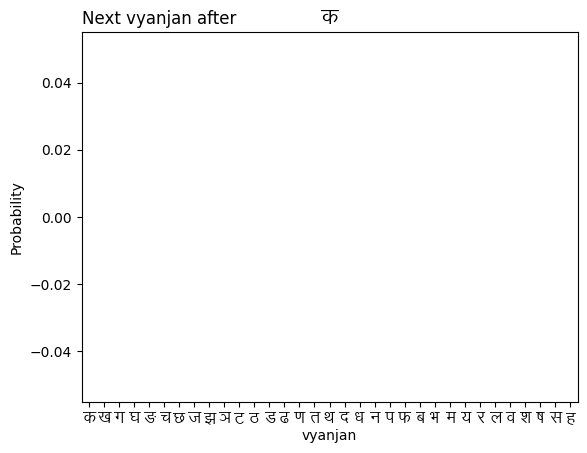

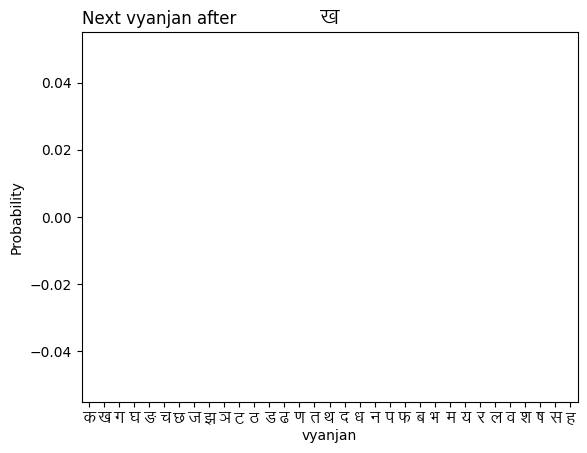

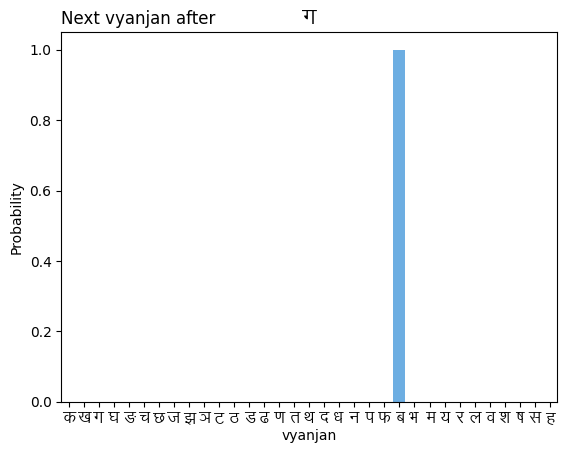

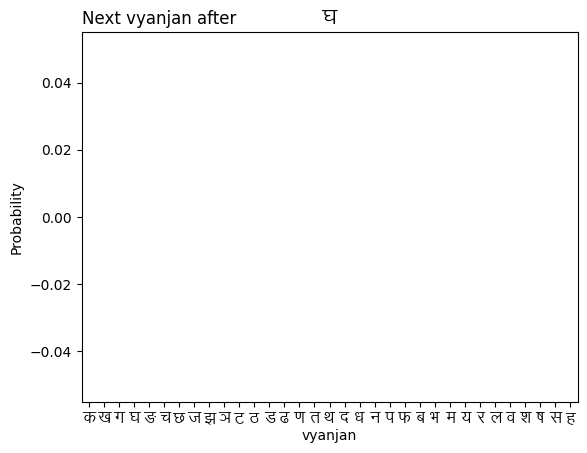

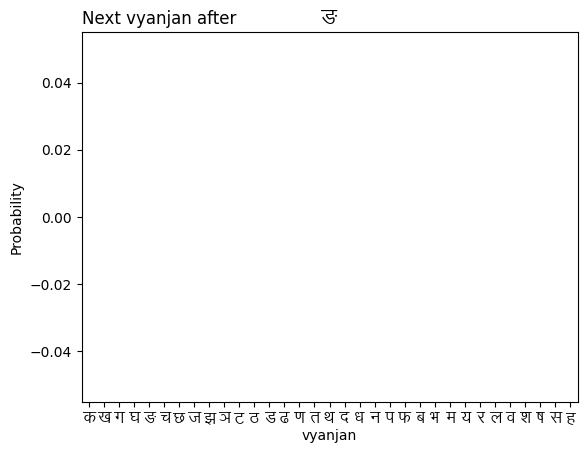

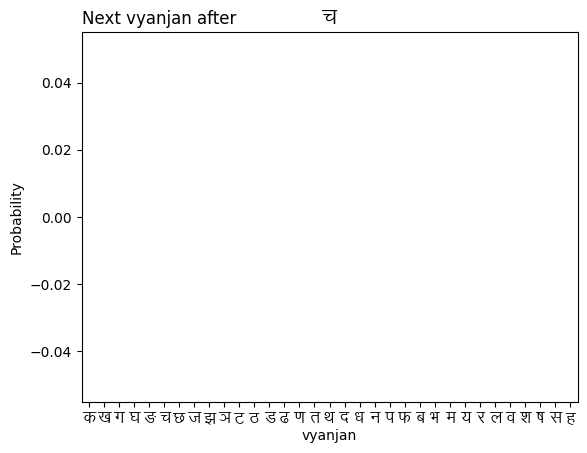

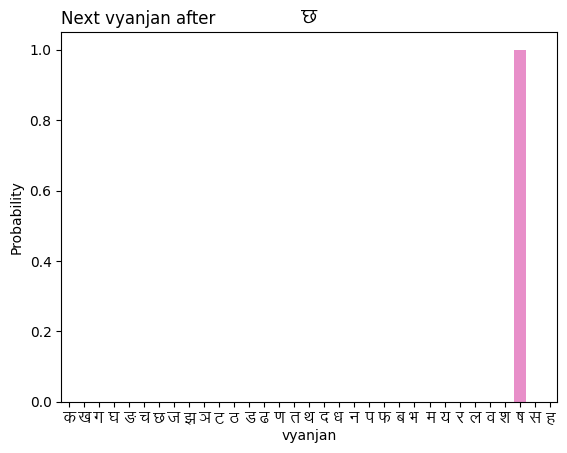

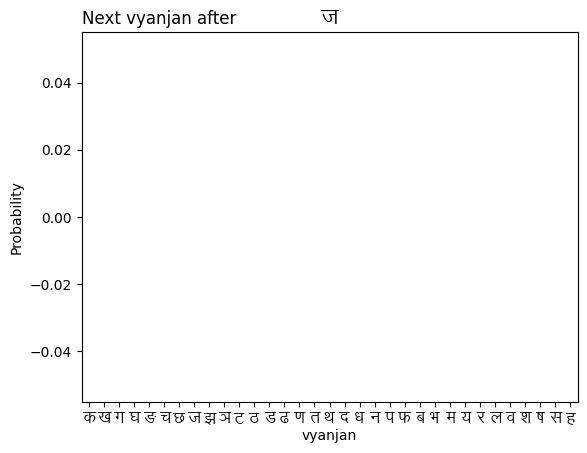

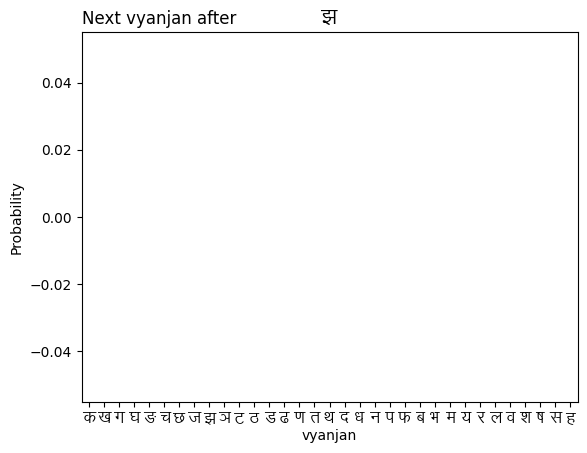

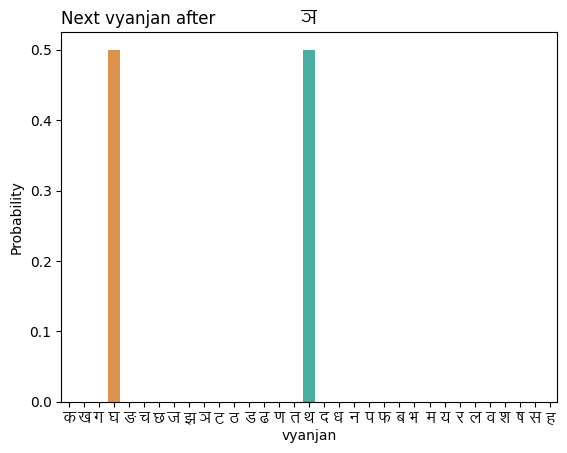

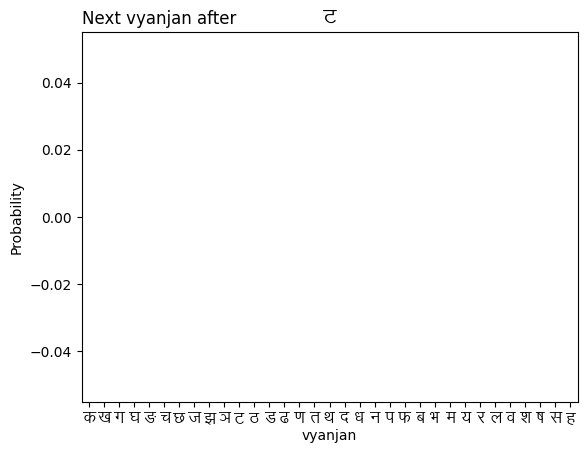

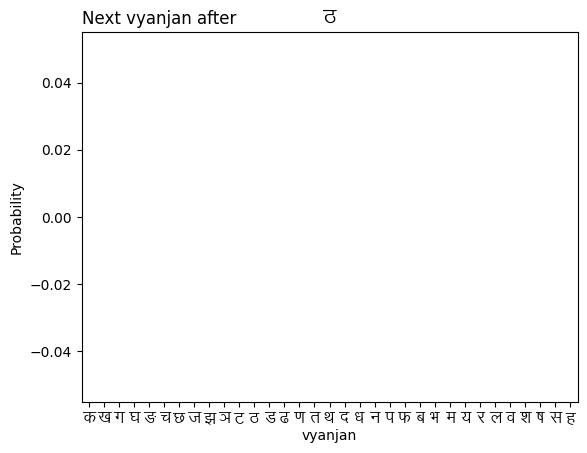

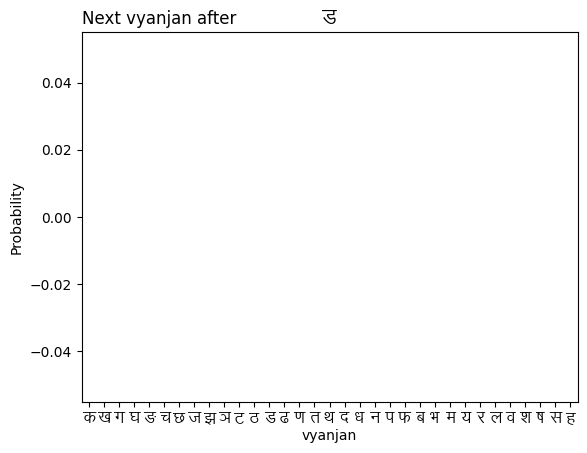

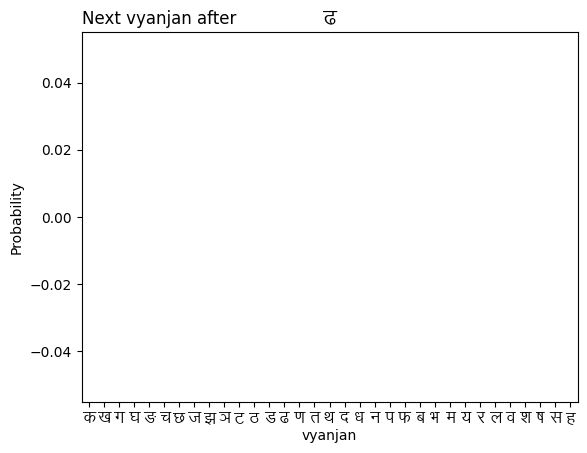

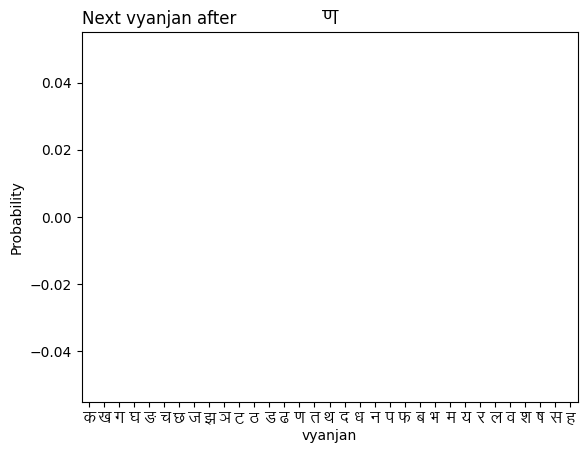

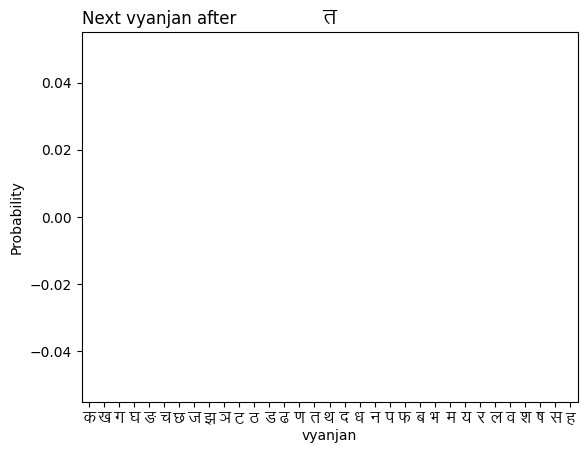

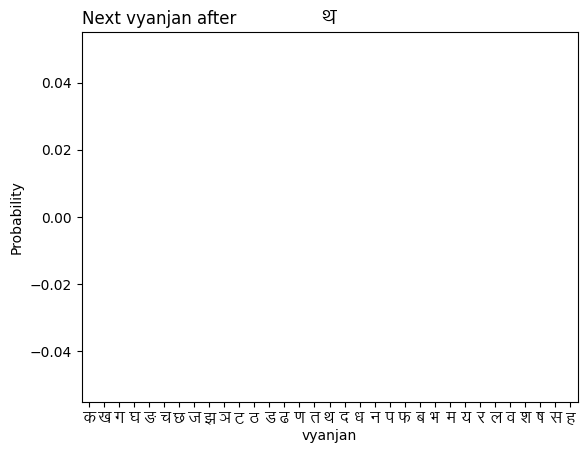

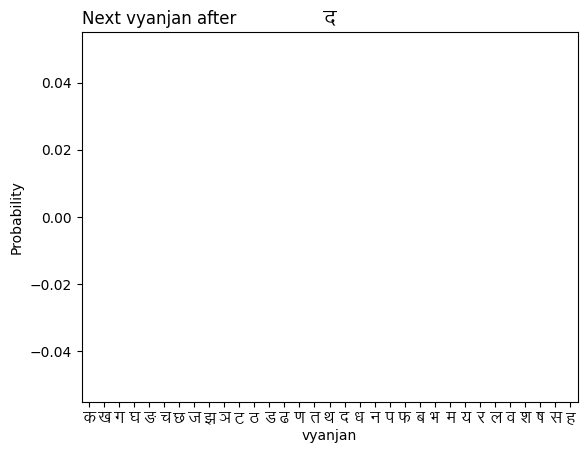

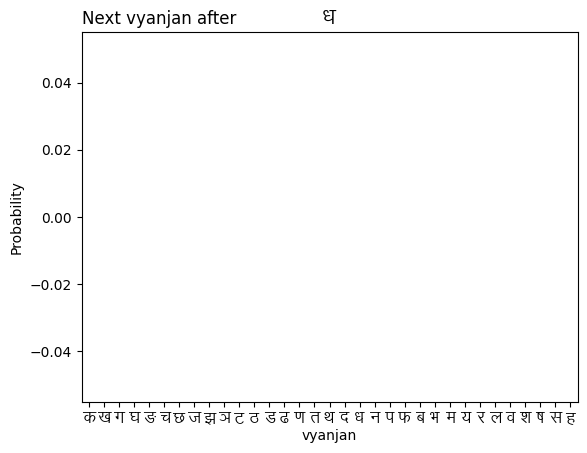

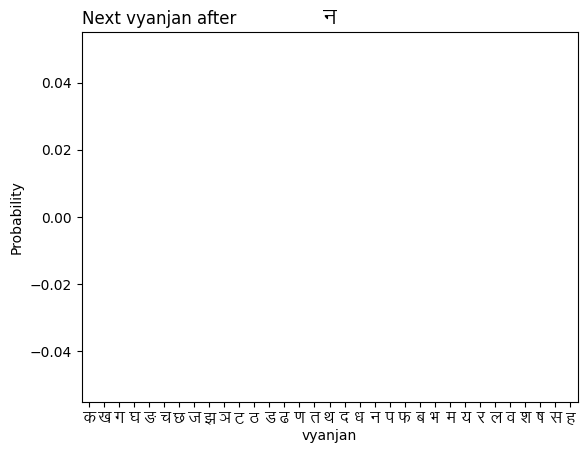

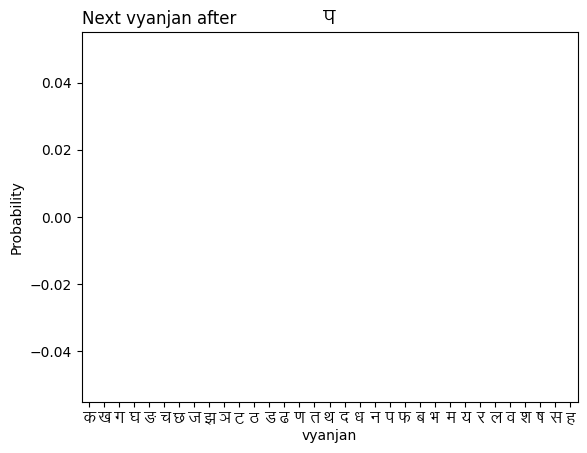

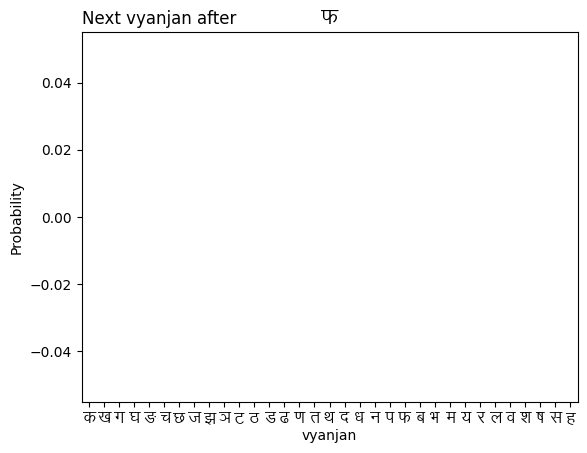

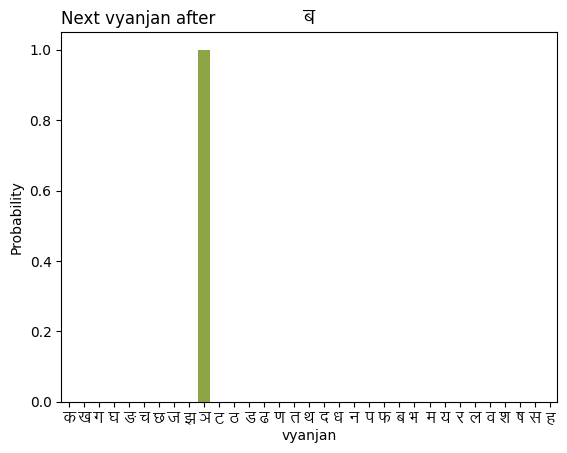

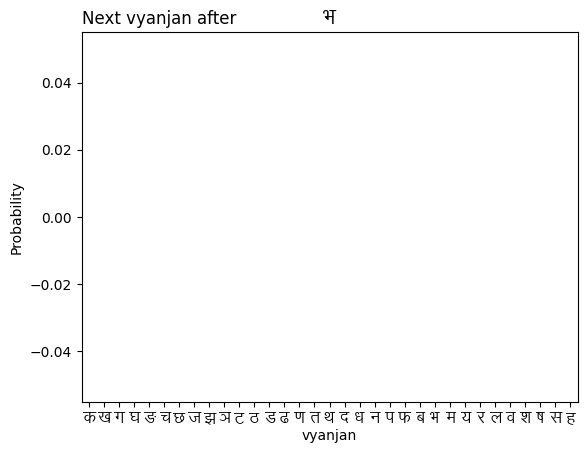

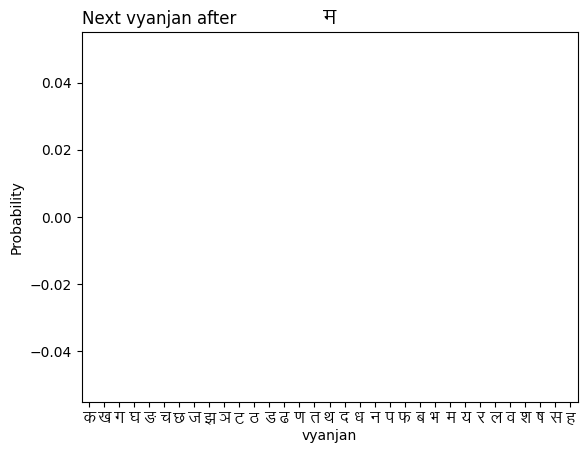

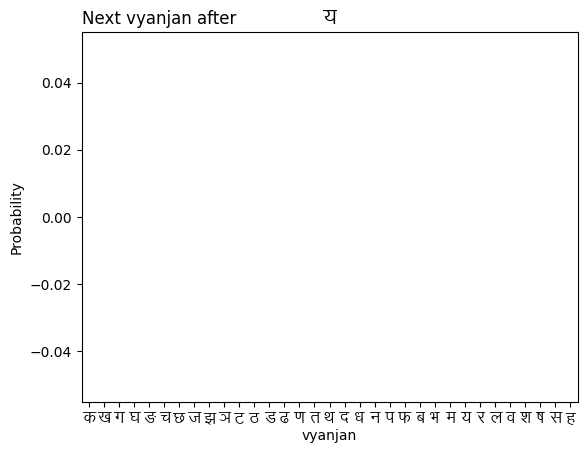

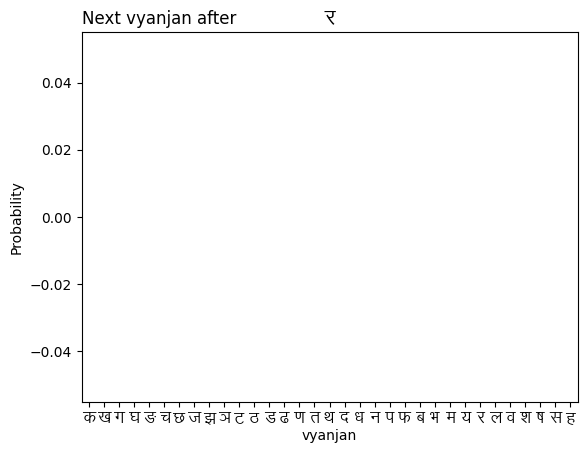

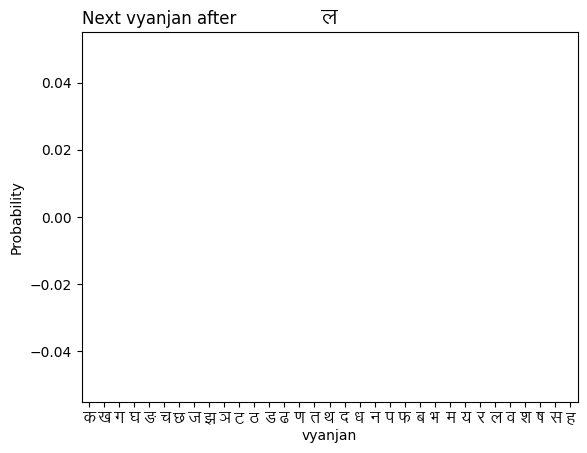

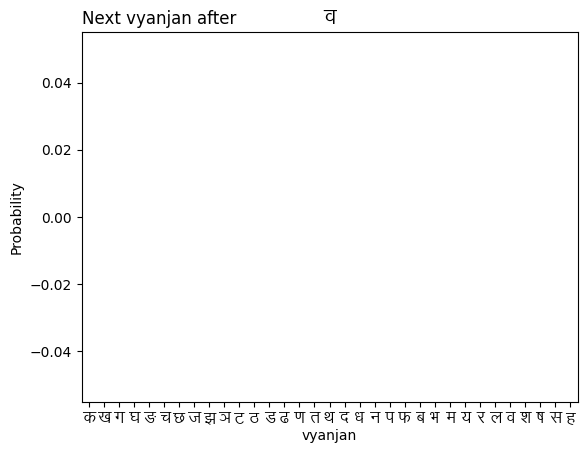

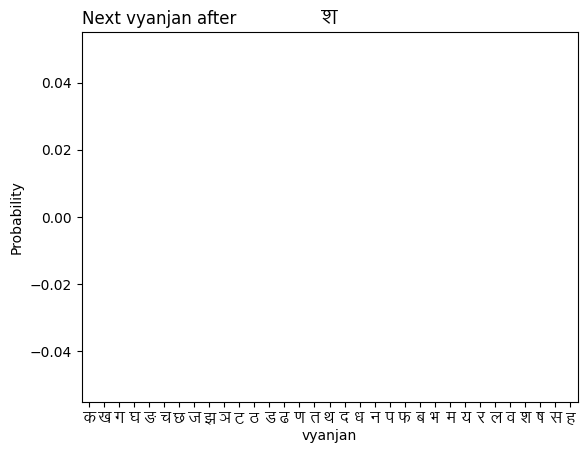

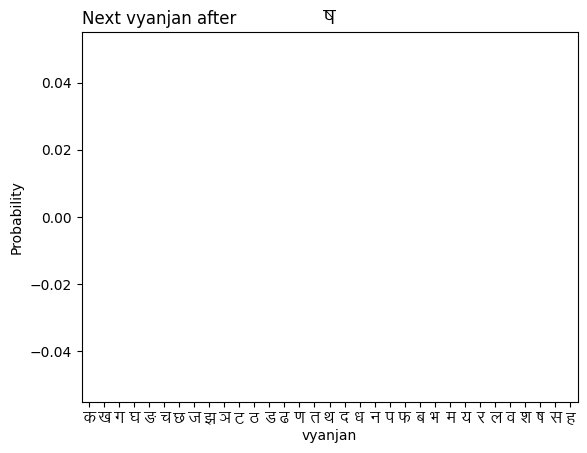

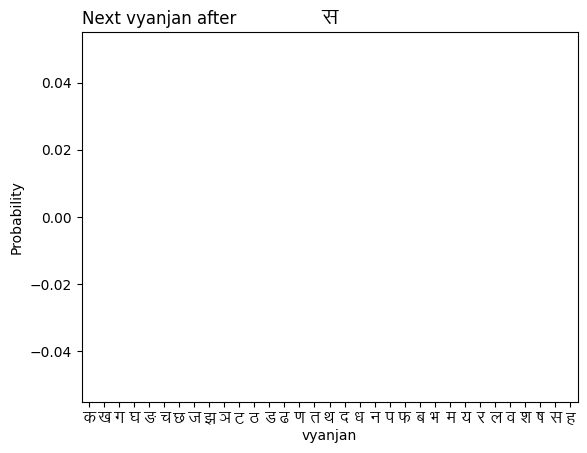

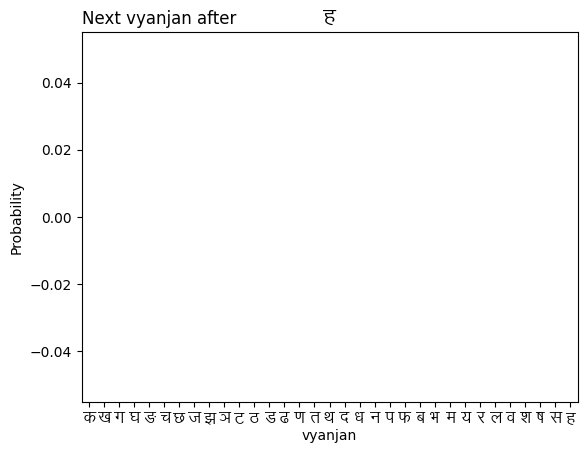

In [17]:
for i in range(len(hc.vyanjans)):
    generateCSV_filePath(CVyanjandf[hc.vyanjans[i]][0],f'vyanjanChart{i}.csv',f'./DecryptData/{hc.vyanjans[i]}/')
    PlotBarGraph_filePath(CVyanjandf[hc.vyanjans[i]][0],'vyanjan',f'./DecryptData/{hc.vyanjans[i]}/',hc.vyanjans[i],'vyanjan')

C:\Users\rudra\AppData\Local\Temp\ipykernel_7452\1358973827.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


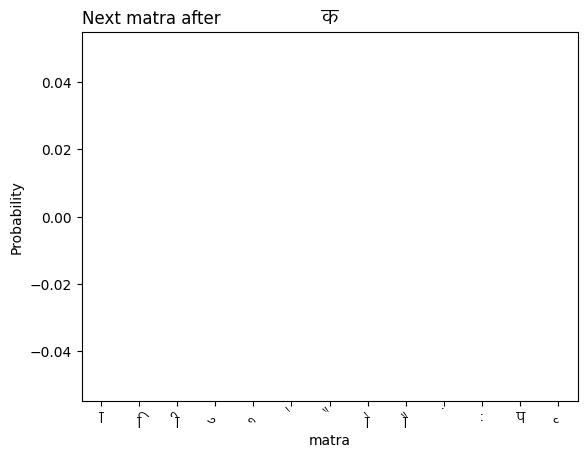

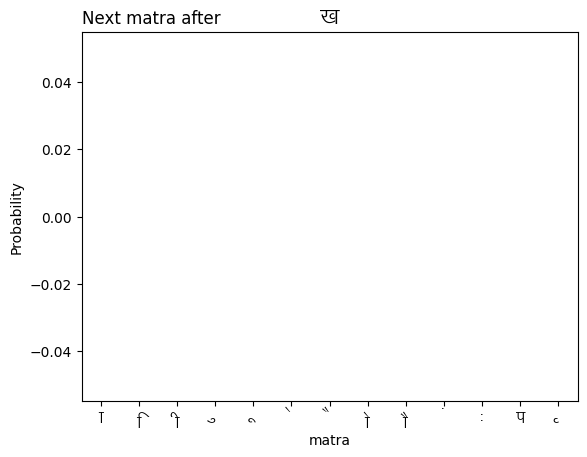

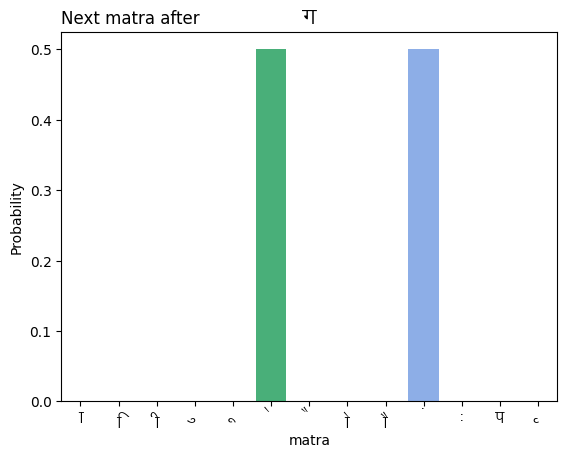

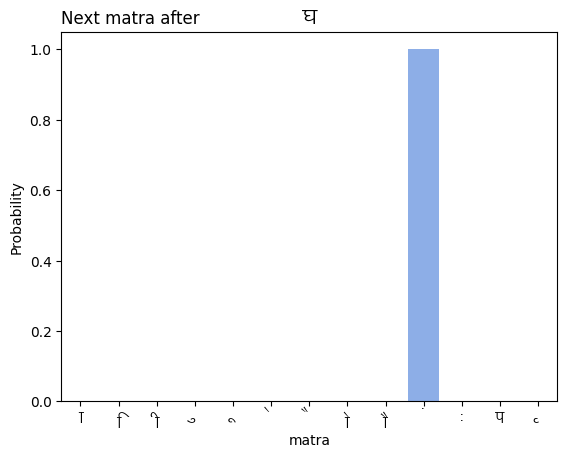

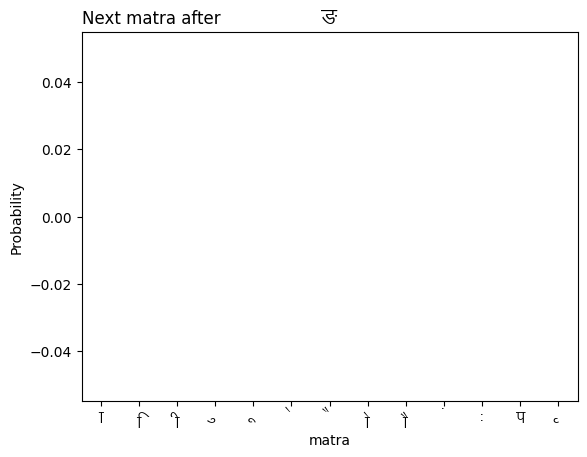

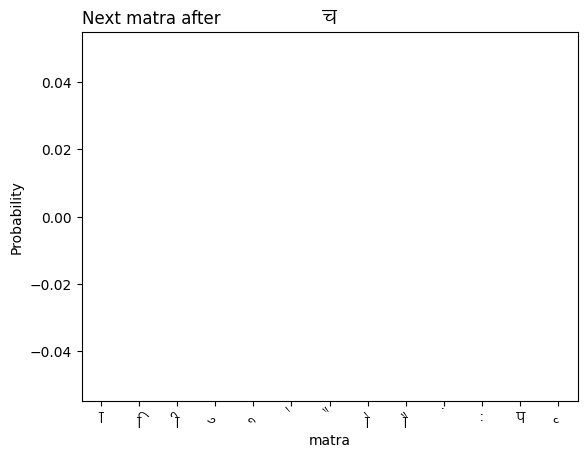

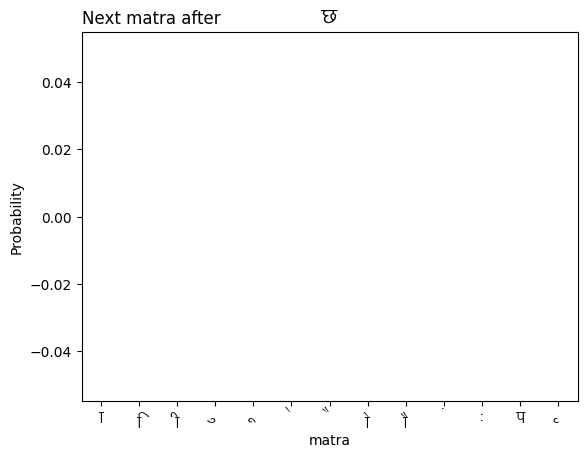

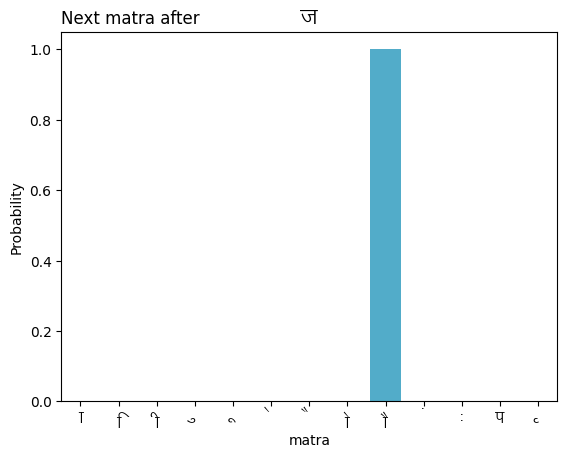

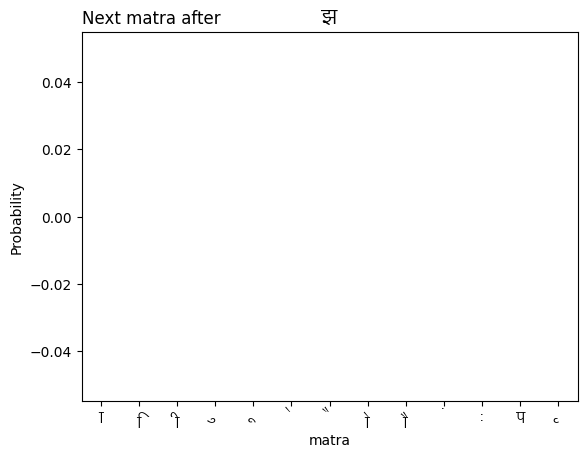

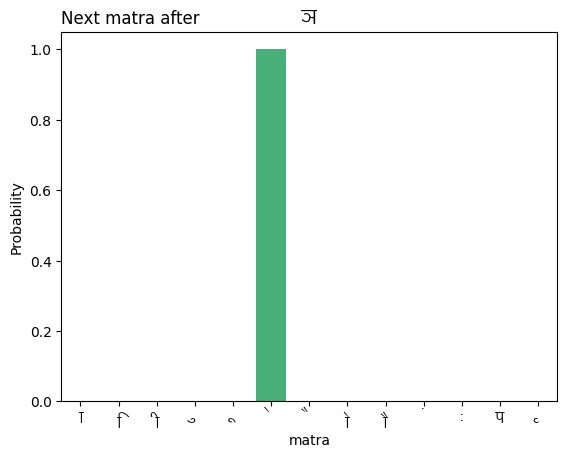

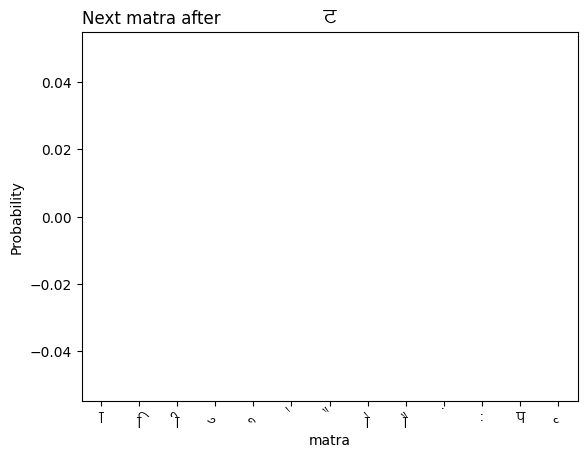

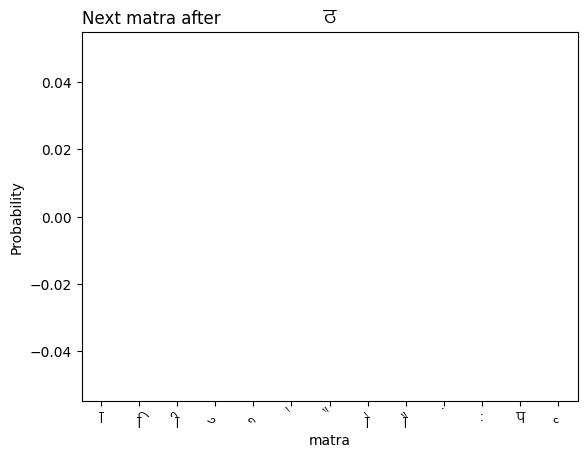

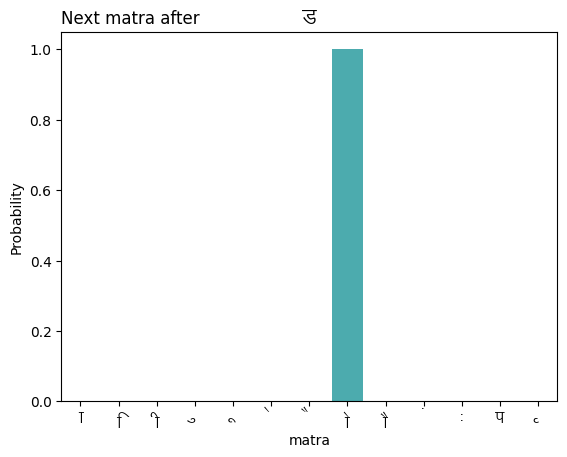

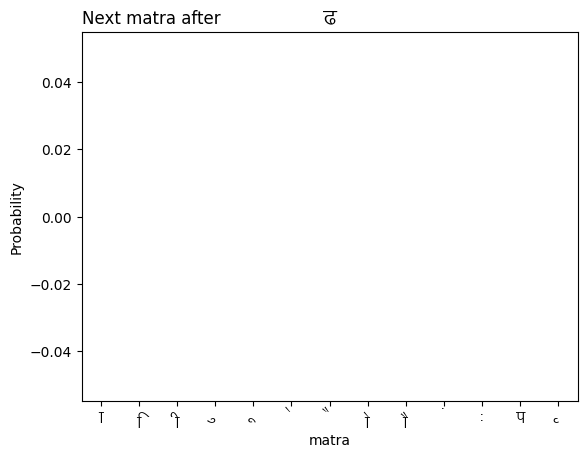

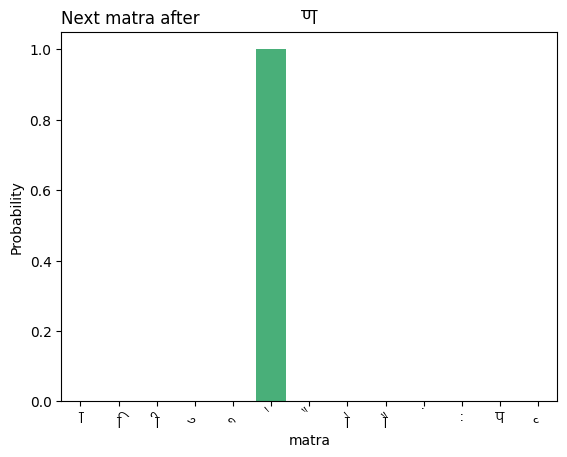

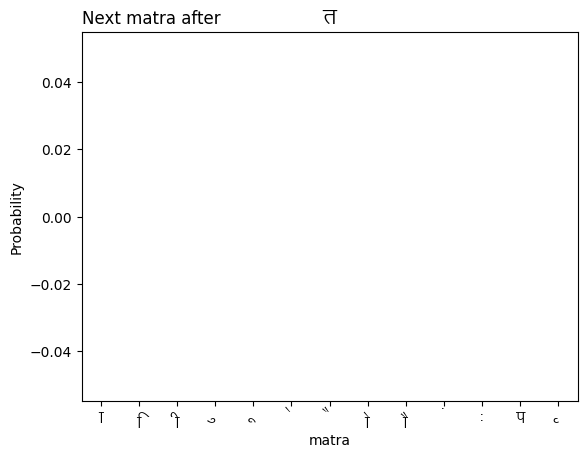

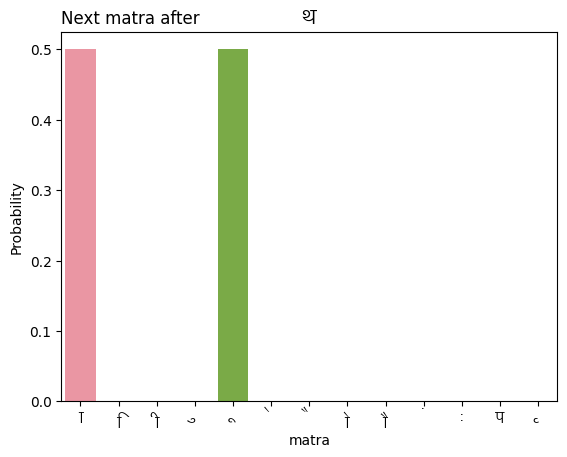

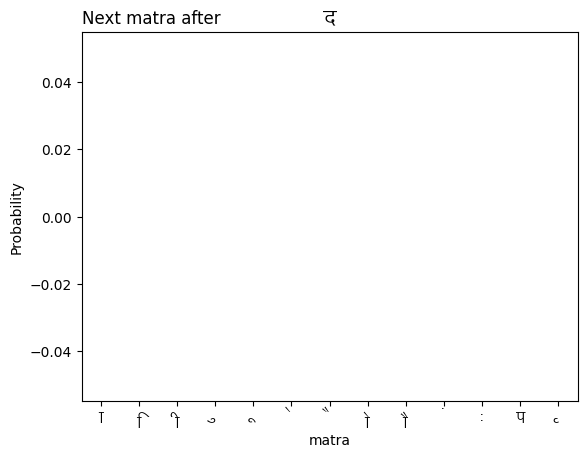

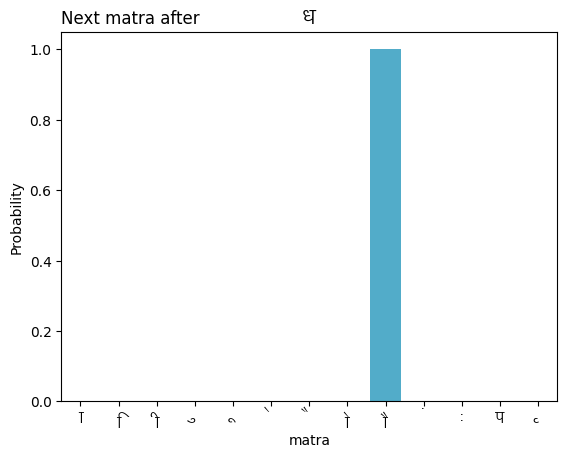

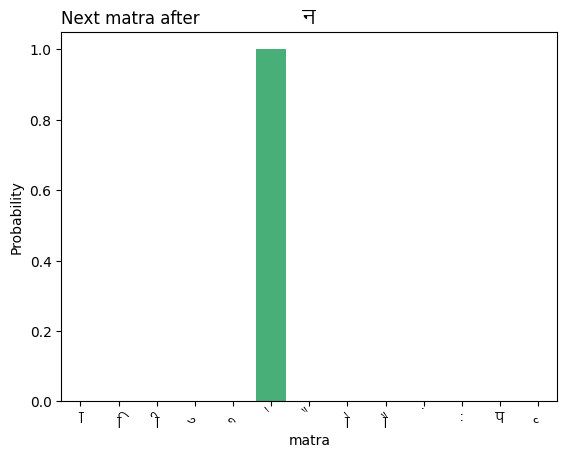

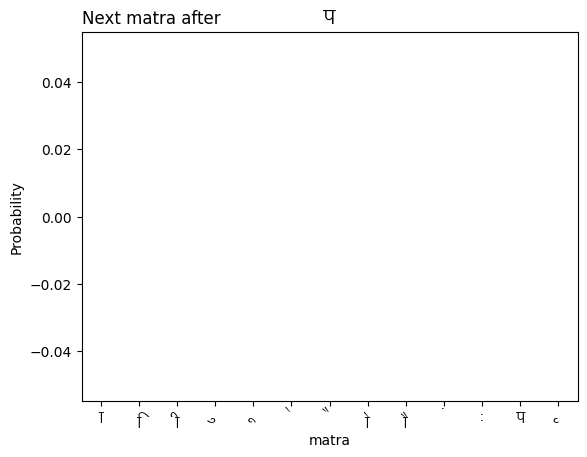

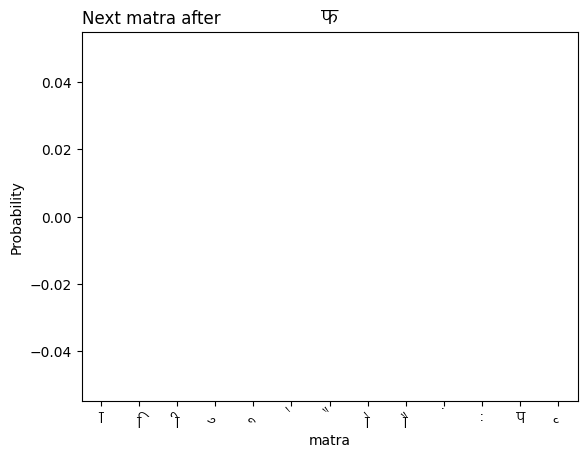

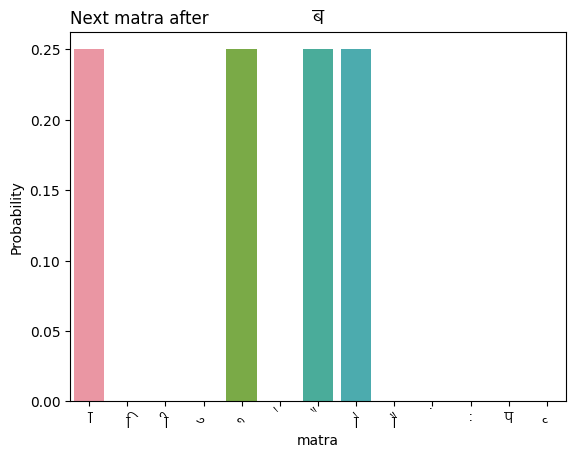

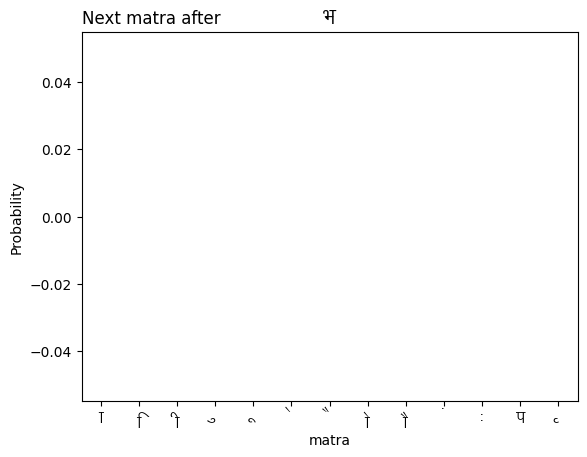

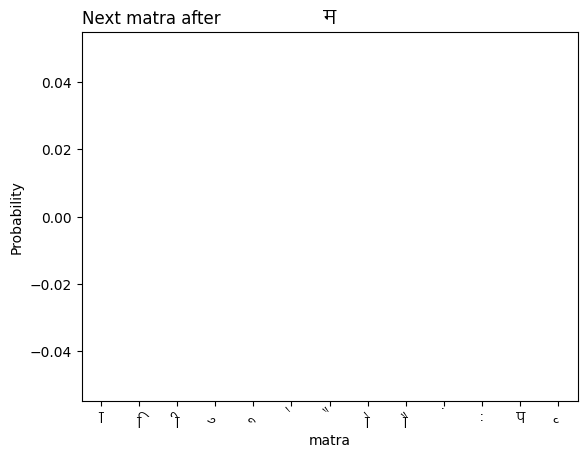

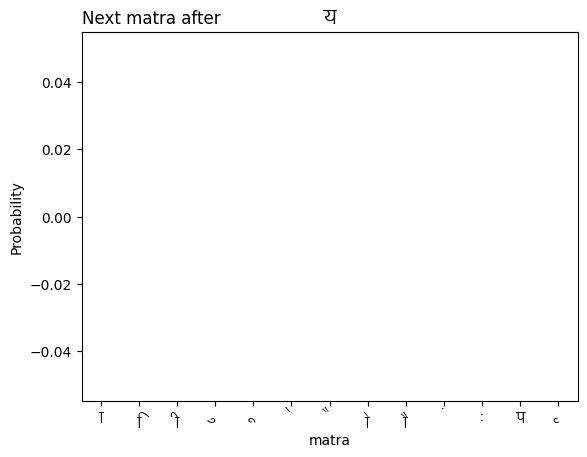

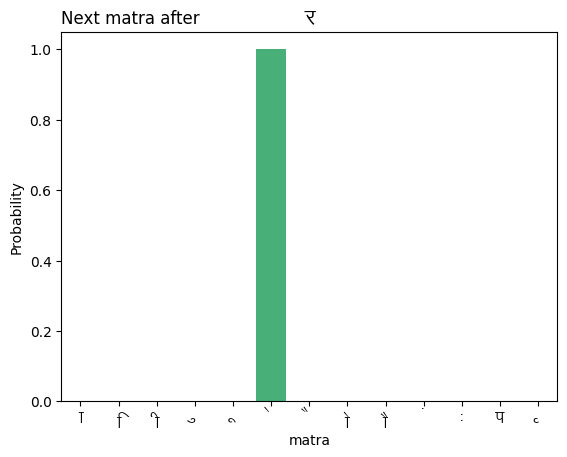

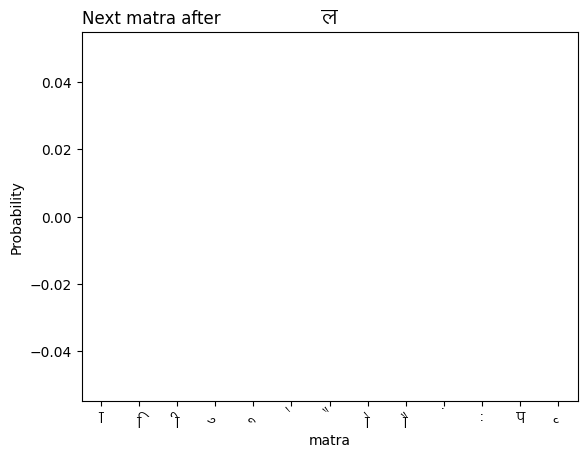

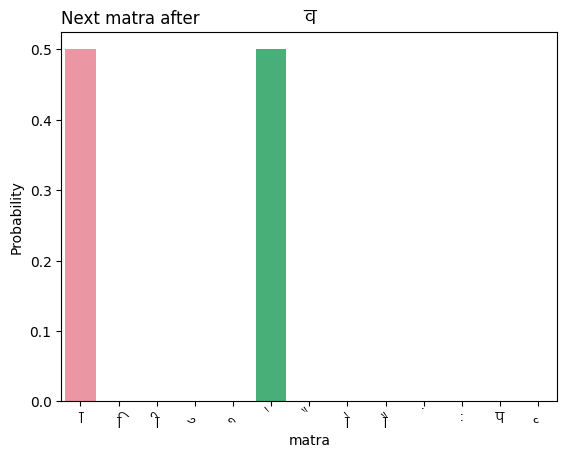

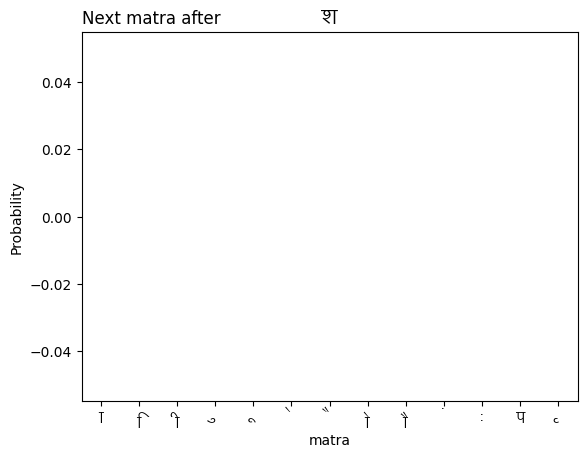

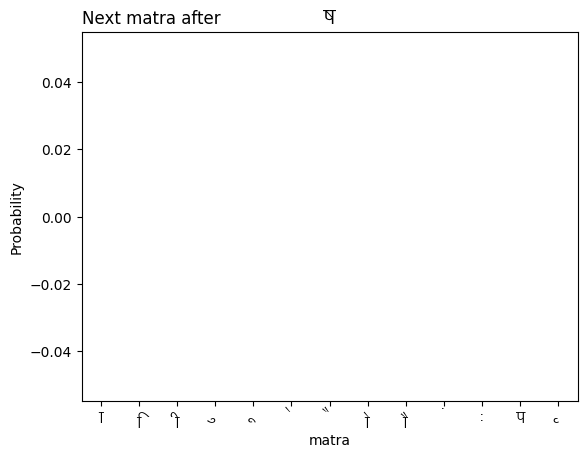

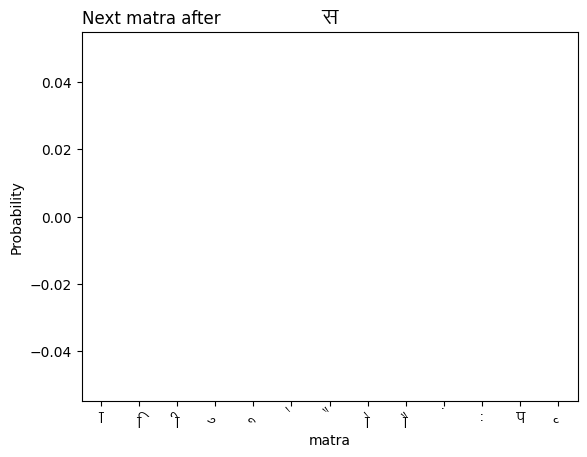

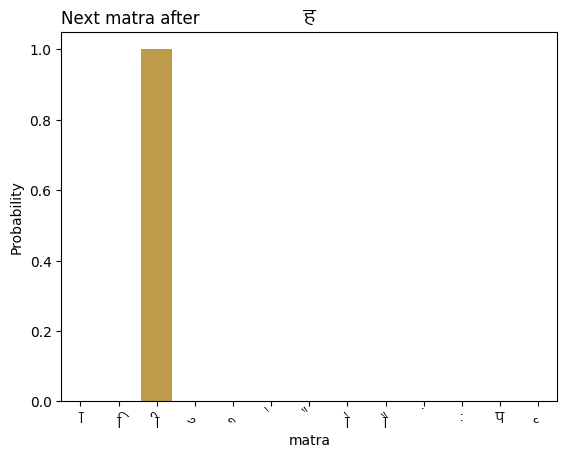

In [19]:
for i in range(len(hc.vyanjans)):
    generateCSV_filePath(CVyanjandf[hc.vyanjans[i]][1],f'matraChart{i}.csv',f'./DecryptData/{hc.vyanjans[i]}/')
    PlotBarGraph_filePath(CVyanjandf[hc.vyanjans[i]][1],'matra',f'./DecryptData/{hc.vyanjans[i]}/',hc.vyanjans[i],'matra')

Character Analysis

In [20]:
emptVyanjanCol = np.array(hc.vyanjans)
emptSwarCol = np.array(hc.swars)
emptMatraCol = np.array(hc.matras)

df_CVyanjan = pd.DataFrame()
df_CMatra = pd.DataFrame()
df_CSwar = pd.DataFrame()

df_CVyanjan['vyanjan'] = emptVyanjanCol
df_CVyanjan['frequency'] = np.zeros(len(emptVyanjanCol),dtype=float)

df_CMatra['matra'] = emptMatraCol
df_CMatra['frequency'] = np.zeros(len(emptMatraCol),dtype=float)

df_CSwar['swar'] = emptSwarCol
df_CSwar['frequency'] = np.zeros(len(emptSwarCol),dtype=float)



In [22]:
with open('CipherTextoutput.txt',encoding='utf-8') as f:
    sentence=f.read()
    
    words = sentence.split()
    print(f'Number of words: {len(words)}')
    
    for word in words:
        for i in range(len(word)):
            df_CVyanjan.loc[df_CVyanjan['vyanjan'] == word[i], 'frequency'] += 1
            df_CMatra.loc[df_CMatra['matra'] == word[i], 'frequency'] += 1
            df_CSwar.loc[df_CSwar['swar'] == word[i], 'frequency'] += 1            

        
print(sentence)


Number of words: 14
अिस नेरे बा वेगबैणेवा धौगंथू छष्ष्ञघंष बो अिस नेरे बू ञेगे डोजौथ बञथा हीि। 


In [23]:
generateCSV_filePath(df_CVyanjan,'CVyanjan.csv','./DecryptData/')
generateCSV_filePath(df_CMatra,'CMatra.csv','./DecryptData/')
generateCSV_filePath(df_CSwar,'CSwar.csv','./DecryptData/')

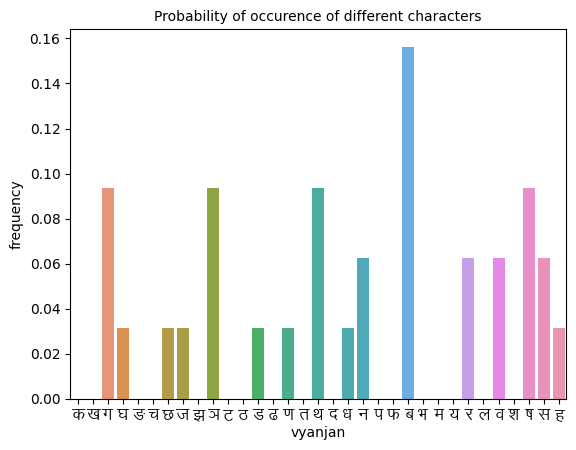

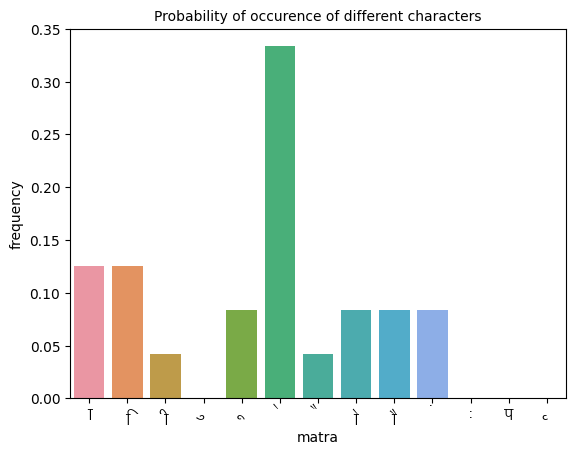

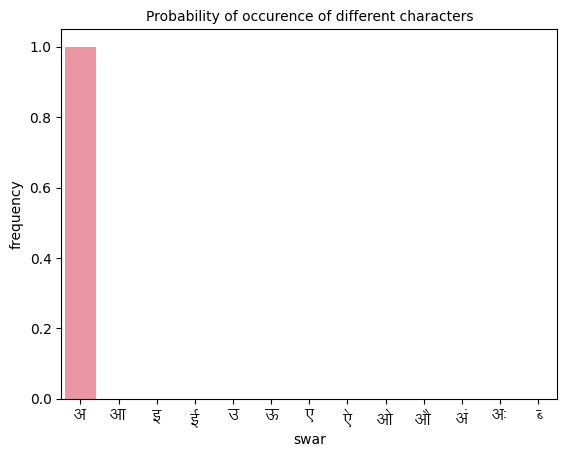

In [24]:
PlotBarGraph(df_CVyanjan,'vyanjan','./DecryptData/')
PlotBarGraph(df_CMatra,'matra','./DecryptData/')
PlotBarGraph(df_CSwar,'swar','./DecryptData/')